<a href="https://colab.research.google.com/github/Jantakan-s/portfolio/blob/main/Bike_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Store Analysis**

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
## create connection
con = sqlite3.connect("bike_store.db")

In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:///{"bike_store.db"}

In [ ]:
%sql SELECT name FROM sqlite_master

 * sqlite:///bike_store.db
Done.


name
brands
categories
order_items
orders
products
staffs
stocks
stores
customers


#### **Database Diagram**

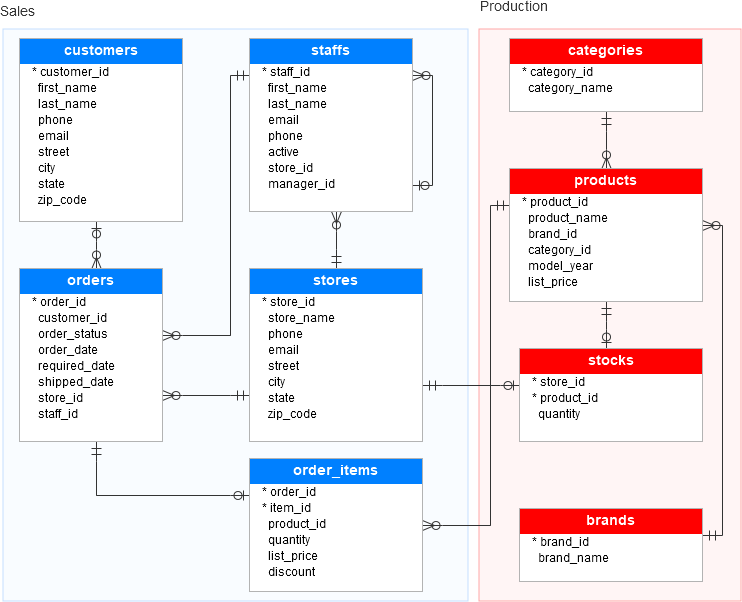

### **What is the overview of total sales by year?**

In [ ]:
%%sql
WITH order_time AS (SELECT order_id, STRFTIME('%Y', order_date) AS Year FROM orders)

SELECT Year, round(sum(quantity * list_price * (1 - discount)),2) AS Revenue
FROM order_items oi
JOIN order_time ot ON oi.order_id = ot.order_id
GROUP BY Year;

 * sqlite:///bike_store.db
Done.


Year,Revenue
2016,2427378.53
2017,3447208.24
2018,1814529.79


The revenue trend analysis reveals a positive growth pattern from 2016 to 2017, followed by a sharp decline in 2018.

### **Which month experiences peak revenue?**

In [ ]:
%%sql
WITH order_time AS (SELECT order_id, STRFTIME('%m', order_date) AS Month FROM orders)

SELECT Month, round(sum(quantity * list_price * (1 - discount)),2) AS Revenue
FROM order_items oi
JOIN order_time ot
ON oi.order_id = ot.order_id
GROUP BY Month
ORDER BY Revenue desc;

 * sqlite:///bike_store.db
Done.


Month,Revenue
04,1212356.82
01,882193.01
03,853503.22
02,669694.13
06,589616.77
09,575460.83
10,526187.52
08,524588.65
11,475269.32
05,473503.25


April is the peak month, with recorded the highest revenue of 1,212,356.82, followed by January with 882,193.01, and March with 853,503.22. While July had the lowest revenue of 440,890.11, followed by December with 465,852.93, and May with 473,503.25.

### **What is the best-selling category?**

In [ ]:
%%sql
WITH pro AS (SELECT product_id, category_id FROM products),
cate AS (SELECT * FROM categories)

SELECT category_name, round(sum(quantity * list_price * (1 - discount)),2) AS Revenue
FROM order_items oi
JOIN pro pr ON oi.product_id = pr.product_id
JOIN cate ca ON pr.category_id = ca.category_id
GROUP BY category_name
ORDER BY Revenue desc;

 * sqlite:///bike_store.db
Done.


category_name,Revenue
Mountain Bikes,2715079.53
Road Bikes,1665098.49
Cruisers Bicycles,995032.62
Electric Bikes,916684.78
Cyclocross Bicycles,711011.84
Comfort Bicycles,394020.1
Children Bicycles,292189.2


The best-selling categoty is Mountain Bikes, which generated revenue of 2,715,079.53, followed by Road Bikes with 1,665,098.49 and Cruisers Bicycles accounted for revenue of 995,032.62.

### **What is the best-selling brand?**

In [ ]:
%%sql
WITH pro AS (SELECT product_id, brand_id FROM products),
brand AS (SELECT * FROM brands)

SELECT brand_name, round(sum(quantity * list_price * (1 - discount)),2) AS Revenue
FROM order_items oi
JOIN pro pr ON oi.product_id = pr.product_id
JOIN brand br ON pr.brand_id = br.brand_id
GROUP BY brand_name
ORDER BY Revenue desc;

 * sqlite:///bike_store.db
Done.


brand_name,Revenue
Trek,4602754.35
Electra,1205320.82
Surly,949507.06
Sun Bicycles,341994.93
Haro,185384.55
Heller,171459.08
Pure Cycles,149476.34
Ritchey,78898.95
Strider,4320.48


Trek leads as the top-selling brand, accruing of 4,602,754.35. Electra follows with revenue totaling 1,205,320.82, and Surly accounts for revenue of 949,507.06.

### **Which store is the best seller?**

In [ ]:
%%sql
WITH ord AS (SELECT order_id, store_id FROM orders),
store AS (SELECT * FROM stores)

SELECT store_name, city, state, round(sum(quantity * list_price * (1 - discount)),2) AS Revenue
FROM order_items oi
JOIN ord od ON oi.order_id = od.order_id
JOIN store st ON od.store_id = st.store_id
GROUP BY store_name
ORDER BY Revenue desc;

 * sqlite:///bike_store.db
Done.


store_name,city,state,Revenue
Baldwin Bikes,Baldwin,NY,5215751.28
Santa Cruz Bikes,Santa Cruz,CA,1605823.04
Rowlett Bikes,Rowlett,TX,867542.24


The top-performing store is Baldwin Bikes, located in Baldwin, New York, with revenue of 5,215,751.28. Followed by Santa Cruz Bikes in Santa Cruz, California, generated revenue of 1,605,823.04, while Rowlett Bikes in Rowlett, Texas, reported the lowest revenue at 867,542.24.

### **What are the top-selling brands within each category?**

In [ ]:
%%sql
WITH brand AS (SELECT * FROM brands),
     product AS (SELECT * FROM products),
     category AS (SELECT * FROM categories),
     revenue_cal AS (
        SELECT c.category_name, b.brand_name,
            round(sum(oi.quantity * oi.list_price * (1 - oi.discount)), 2) AS revenue
        FROM order_items oi
            JOIN product p ON oi.product_id = p.product_id
            JOIN brand b ON p.brand_id = b.brand_id
            JOIN category c ON p.category_id = c.category_id
        GROUP BY c.category_name, b.brand_name
    )

SELECT rc.category_name, rc.brand_name, max(rc.revenue) AS max_revenue
FROM revenue_cal rc
GROUP BY rc.category_name
ORDER BY max_revenue desc;

 * sqlite:///bike_store.db
Done.


category_name,brand_name,max_revenue
Mountain Bikes,Trek,1847700.46
Road Bikes,Trek,1596620.18
Electric Bikes,Trek,838371.59
Cruisers Bicycles,Electra,694909.13
Cyclocross Bicycles,Surly,439644.62
Comfort Bicycles,Electra,271542.08
Children Bicycles,Electra,207605.72


Trek is the top-selling brand in the categories of Mountain Bikes, Road Bikes, and Electric Bikes, with revenues of 1,847,700.46, 1,596,620.18, and 838,371.59, respectively. Meanwhil, Surly emerge as the leading brand in the Cyclocross Bicycles, with revenues totaling 439,644.62. Additionally, Electra is the best-selling brand in the categories of Cruisers Bicycles, Comfort Bicycles, and Children Bicycles, with revenues of 694,909.13, 271,542.08, and 207,605.72, respectively.

### **Repeat customers vs First-time customers**

In [ ]:

%%sql

WITH seg AS (
    SELECT customer_id,
        CASE
            WHEN count(*) > 1 THEN 'Repeat Customer'
            ELSE 'First-Time Customer'
        END AS customer_segment
    FROM orders
    GROUP BY customer_id)

SELECT customer_segment, count(*) AS customer_count
FROM seg
GROUP BY customer_segment;

 * sqlite:///bike_store.db
Done.


customer_segment,customer_count
First-Time Customer,1314
Repeat Customer,131


The majority of customers are first-time customers with a count of 1,314 individuals (90.93%), while a smaller segment of the customers classified as repeat customers consisting of 131 individuals (9.07%).

### **Which product categories are favored by customers for repeat purchases?**

In [ ]:
%%sql

WITH seg AS (
    SELECT customer_id, order_id,
        CASE
            WHEN count(*) > 1 THEN 'Repeat Customer'
            ELSE 'First-Time Customer'
        END AS customer_segment
    FROM orders
    GROUP BY customer_id),
    pro AS (SELECT product_id, category_id FROM products),
    cate AS (SELECT * FROM categories)

SELECT category_name, count(*) as Num_repeat
FROM order_items oi
JOIN seg se ON oi.order_id = se.order_id
JOIN pro pr ON pr.product_id = oi.product_id
JOIN cate ca ON ca.category_id = pr.category_id
WHERE customer_segment = 'Repeat Customer'
GROUP BY category_name
order by Num_repeat desc;

 * sqlite:///bike_store.db
Done.


category_name,Num_repeat
Mountain Bikes,108
Cruisers Bicycles,102
Children Bicycles,49
Comfort Bicycles,41
Cyclocross Bicycles,30
Road Bikes,24
Electric Bikes,19


The category with the highest rate of repeat purchases is Mountain Bikes, with 108 occurrences. Following closely is Cruisers Bicycles, with 102 repeat purchases, while Electric Bikes have the fewest repeat purchases, totaling only 19 occurrences.